## Day 77 Lecture 1 Assignment

In this assignment, we will learn about convolutions using Dask arrays.

In [1]:
import dask.array as da

In [2]:
import os
import random

import cv2
import numpy as np
import pandas as pd

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
image = cv2.imread('/content/drive/MyDrive/python_for_data_scientists/DSI07/DataSets/6-facial-recognition-hero.jpg', cv2.IMREAD_GRAYSCALE)

In [9]:
image.shape

(1360, 2040)

In [10]:
image_da = da.asarray(image)

In [12]:
image_da

dask.array<array, shape=(1360, 2040), dtype=uint8, chunksize=(1360, 2040), chunktype=numpy.ndarray>

Rechunk the image array into chunks of 100x100.

In [13]:
# Answer below
image_dask = da.rechunk(image_da, chunks=(100, 100))

In [14]:
image_dask

dask.array<rechunk-merge, shape=(1360, 2040), dtype=uint8, chunksize=(100, 100), chunktype=numpy.ndarray>

In the code above, we read an image of a face and converted it into a Dask array. We will use this array to learn about convolutions. You can learn more about convolutions <a href="http://setosa.io/ev/image-kernels/">here</a>.

Convolutions are transformations of matrices that help us create convolutional neural network (which are crucial in deep learning) or apply effects to images like blurring or sharpening.

Our kernel is a 3x3 matrix which we apply to every 3x3 subset of our image matrix.

To start with our transformation, zero pad the image matrix with a width of one. This means that our output will be a matrix with an additional row and additional column of zeros on both sides. The image below illustrates padding. Use the pad function 
<img src="https://www.researchgate.net/profile/Terje_Midtbo/publication/318967374/figure/fig4/AS:669210783002634@1536563692382/Visualization-of-a-matrix-that-is-zero-padded-with-one-border.png">

In [15]:
# Answer below:

image_dask= np.pad(image_dask, pad_width=1, mode='constant')

What is the shape of our padded array?

In [16]:
# Answer below:
image_dask.shape


(1362, 2042)

To apply a convolution, we will install the `dask-image` package. Do this below.

In [17]:
# Answer below:
!pip install dask-image


     |████████████████████████████████| 71kB 3.3MB/s 
     |████████████████████████████████| 92kB 2.8MB/s 
  Created wheel for dask-image: filename=dask_image-0.4.0-py2.py3-none-any.whl size=31513 sha256=42f509f391a1b103a78a05f32577e0fa96204b65d78591b064e6fd29437fc735
  Stored in directory: /root/.cache/pip/wheels/09/79/3a/05b23d66277338610650cc107c2c6566a0623082d6ed2756f6
  Created wheel for pims: filename=PIMS-0.5-cp36-none-any.whl size=84329 sha256=09eb7203bad99bf4b211fc14f0e674bbff732169a694cb7849fb8186b66674fb
  Stored in directory: /root/.cache/pip/wheels/0e/0a/14/4c33a4cc1b9158e57329a38e8e3e03901ed24060eb322d5462
Successfully built dask-image pims


Import the convolve function from the package

In [20]:
# Answer below:
from dask_image.ndfilters import convolve


Define the sharpen convolution from the setosa.io article mentioned above. Apply the convolution to our padded image.

In [22]:
# Answer below:
sharpen = np.array([[0,-1,0], [-1, 5, -1], [0, -1, 0]])
sharpenned = convolve(image_dask, weights=sharpen)
sharpenned

dask.array<_trim, shape=(1362, 2042), dtype=uint8, chunksize=(100, 100), chunktype=numpy.ndarray>

In [25]:
from matplotlib import pyplot as plt

In [27]:
from google.colab.patches import cv2_imshow

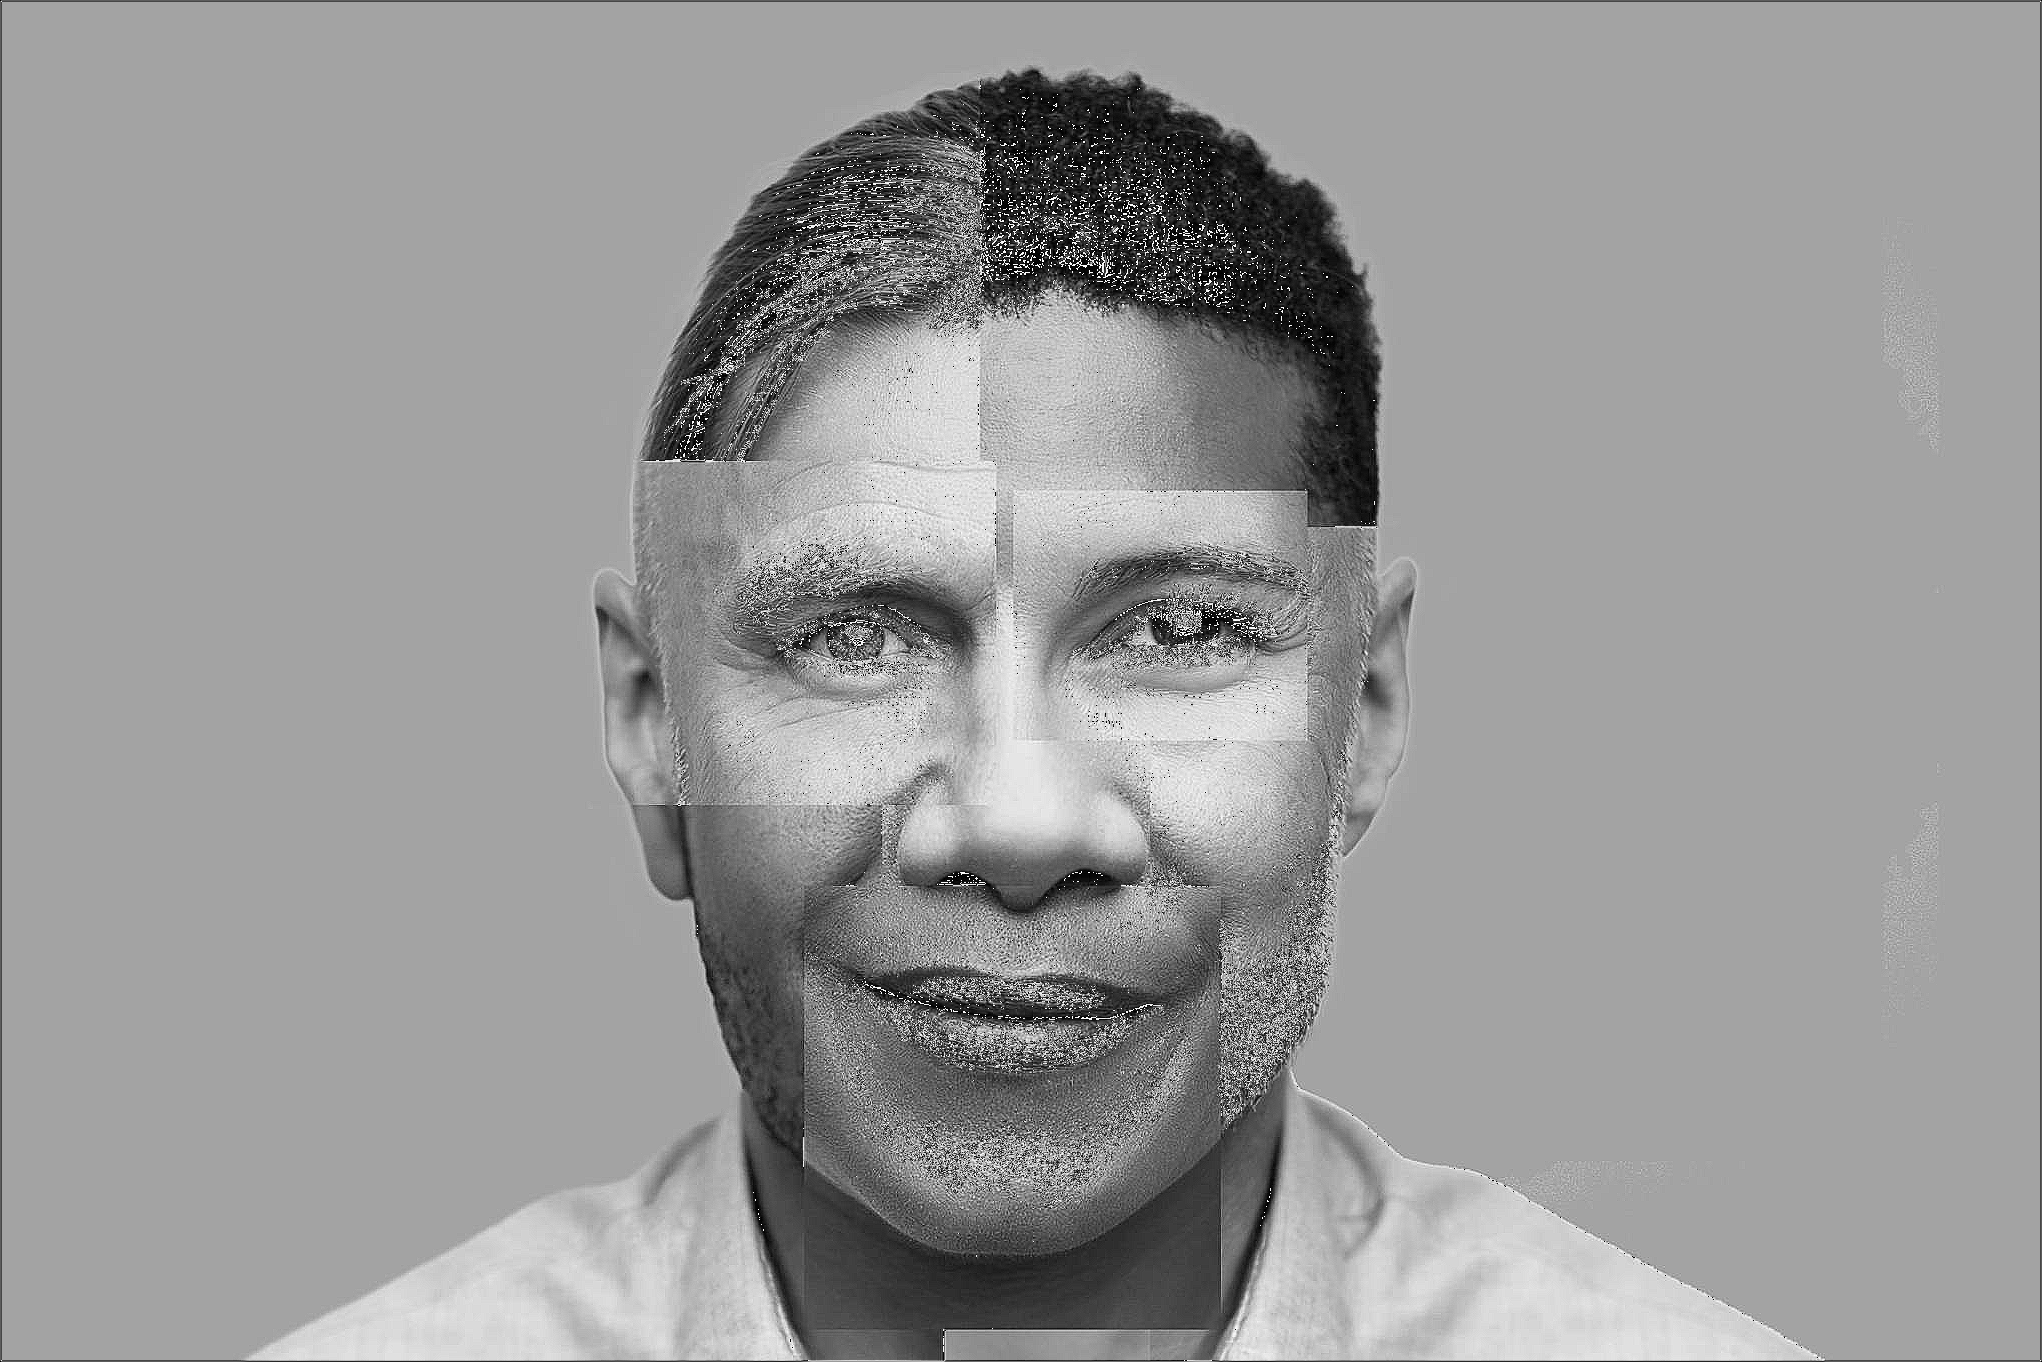

In [28]:
cv2_imshow(sharpenned.compute())